In [1]:
'''
Name: James Davis
Date: May 18, 2022

Task:

Create a prediction algorithm to predict housing prices based on given data

Given:
West_Roxbury_Data_Set_Only.xlsx

'''

'\nName: James Davis\nDate: May 18, 2022\n\nTask:\n\nCreate a prediction algorithm to predict housing prices based on given data\n\nGiven:\nWest_Roxbury_Data_Set_Only.xlsx\n\n'

In [2]:
#Import Libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Load Dataset as train 
#Note: Load sheet 2 'Data'
df_train = pd.read_excel('WEST ROXBURY DATA SET ONLY.xlsx','Data')

In [4]:
#Show Vars
print(df_train.columns)

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')


In [5]:
#Clean up name values 
#Noticed a space after some headers
df_train.rename(columns = {'TOTAL VALUE ': 'Total_Value'
                           ,'TAX': 'Tax_Cost'
                           ,'LOT SQFT ': 'Lot_SQFT'
                           ,'YR BUILT': 'Year_Built'
                           ,'GROSS AREA ': 'Gross_Area'
                           ,'LIVING AREA': 'Living_Area'
                           ,'FLOORS': 'Floor_Count'
                           ,'ROOMS': 'Room_Count'
                           ,'BEDROOMS ': 'Bedroom_Count'
                           ,'FULL BATH': 'Full_Bath_Count'
                           ,'HALF BATH': 'Half_Bath_Count'
                           ,'KITCHEN': 'Kitchen_Count'
                           ,'FIREPLACE': 'Fireplace_Count'
                           ,'REMODEL': 'Remodel'}, inplace=True)

In [6]:
#Describe Sale Price 
print(df_train.describe())

print(df_train.dtypes)


       Total_Value      Tax_Cost      Lot_SQFT   Year_Built   Gross_Area  \
count  5802.000000   5802.000000   5802.000000  5802.000000  5802.000000   
mean    392.685715   4939.485867   6278.083764  1936.744916  2924.842123   
std      99.177414   1247.649118   2669.707974    35.989910   883.984726   
min     105.000000   1320.000000    997.000000     0.000000   821.000000   
25%     325.125000   4089.500000   4772.000000  1920.000000  2347.000000   
50%     375.900000   4728.000000   5683.000000  1935.000000  2700.000000   
75%     438.775000   5519.500000   7022.250000  1955.000000  3239.000000   
max    1217.800000  15319.000000  46411.000000  2011.000000  8154.000000   

       Living_Area      FLOORS    Room_Count  Bedroom_Count  Full_Bath_Count  \
count  5802.000000  5802.000000  5802.000000    5802.000000      5802.000000   
mean   1657.065322     1.683730     6.994829       3.230093         1.296794   
std     540.456726     0.444884     1.437657       0.846607         0.52204

In [7]:
#Any NUlls or zeros?
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
zeros = df_train.isin([0]).sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent,zeros], axis=1, keys=['Total', 'Percent','Zero_Count'])
print(missing_data)

                 Total  Percent  Zero_Count
Remodel              0      0.0           0
Fireplace_Count      0      0.0        1842
Kitchen_Count        0      0.0           0
Half_Bath_Count      0      0.0        2378
Full_Bath_Count      0      0.0           0
Bedroom_Count        0      0.0           0
Room_Count           0      0.0           0
FLOORS               0      0.0           0
Living_Area          0      0.0           0
Gross_Area           0      0.0           0
Year_Built           0      0.0           1
Lot_SQFT             0      0.0           0
Tax_Cost             0      0.0           0
Total_Value          0      0.0           0


In [8]:
#Lets remove that zero "Year_Built"
df_train = df_train[df_train['Year_Built'] != 0]

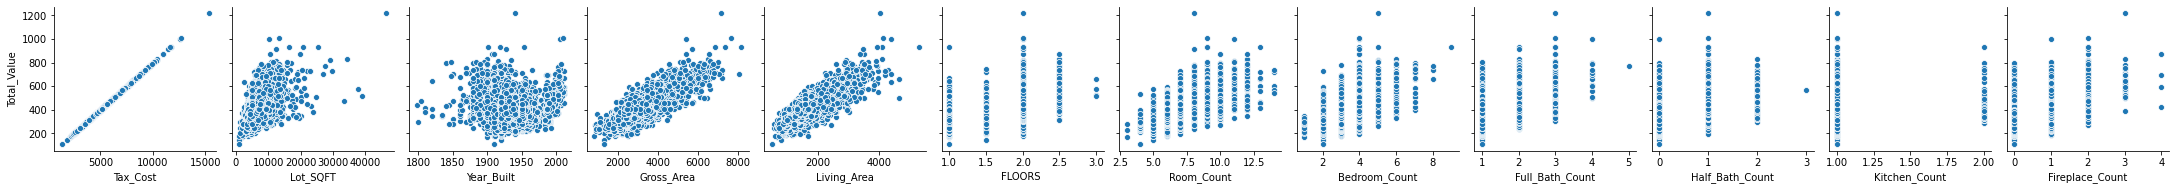

In [9]:
#sns.set_theme(style="ticks")
sns.pairplot(df_train,
            y_vars = ["Total_Value"],
            x_vars = ['Tax_Cost', 'Lot_SQFT', 'Year_Built', 'Gross_Area',
       'Living_Area', 'FLOORS ', 'Room_Count', 'Bedroom_Count',
       'Full_Bath_Count', 'Half_Bath_Count', 'Kitchen_Count',
       'Fireplace_Count'])

In [10]:
'''Learning

Tax_Cost is perfectly linear -- #remove
Lot_SQFT is compact and not as linear as I wanted it to be
Year_Built shows no linear concepts, this was a huge surprise 
to me, but it makes sense, if I have a family of 4 and everyone needs a room
I need 4 rooms, regardless of how large the lot may be.. 
Gross_Area and Living Area are pretty linear! 
Room_Count and Bedroom_Count are linear with a few outliers

#Check correlation of rooms to Gross_Area I assume more rooms == Greater area of houses
'''

'Learning\n\nTax_Cost is perfectly linear -- #remove\nLot_SQFT is compact and not as linear as I wanted it to be\nYear_Built shows no linear concepts, this was a huge surprise \nto me, but it makes sense, if I have a family of 4 and everyone needs a room\nI need 4 rooms, regardless of how large the lot may be.. \nGross_Area and Living Area are pretty linear! \nRoom_Count and Bedroom_Count are linear with a few outliers\n\n#Check correlation of rooms to Gross_Area I assume more rooms == Greater area of houses\n'

In [11]:
#drop tax cost column
df_train.drop('Tax_Cost', axis=1, inplace=True)



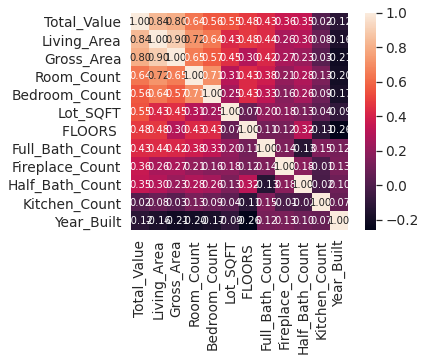

In [12]:
#Find how correlated heat map
#saleprice correlation matrix
corrmat = df_train.corr()
k = 100 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Total_Value')['Total_Value'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [13]:
'''Learning

WOW - Year_Built is almost meaningless compared to Total_Value
#Check if true 

Living_Area is more correlated than Gross_Area
Rooms are more correlated than bedrooms

Rooms, bedrooms are more valuable than lot square footage

Lot_SQFT is more correlated than bathrooms.. 
I guess we can share a 
bathroom and have more area?
'''

'Learning\n\nWOW - Year_Built is almost meaningless compared to Total_Value\n#Check if true \n\nLiving_Area is more correlated than Gross_Area\nRooms are more correlated than bedrooms\n\nRooms, bedrooms are more valuable than lot square footage\n\nLot_SQFT is more correlated than bathrooms.. \nI guess we can share a \nbathroom and have more area?\n'

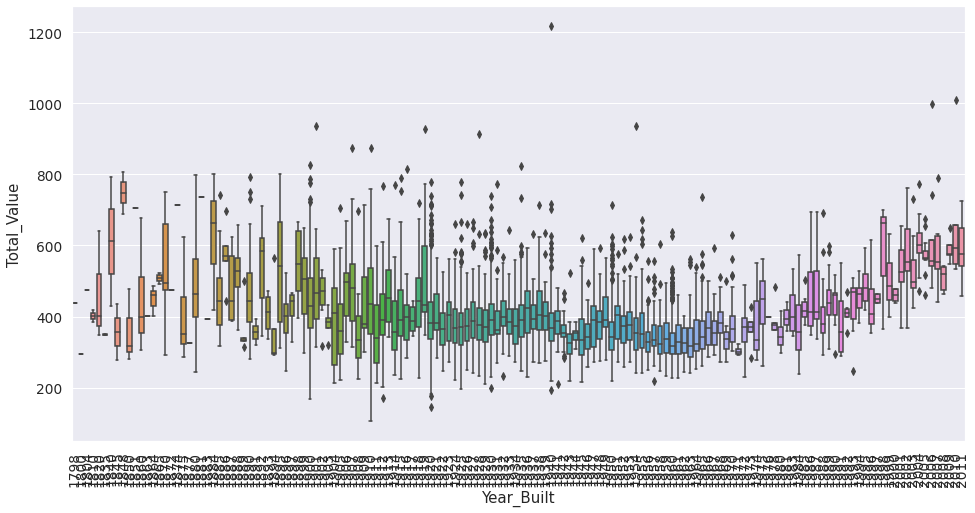

In [14]:
var = 'Year_Built'
data = pd.concat([df_train['Total_Value'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Total_Value", data=data);
plt.xticks(rotation=90);

In [15]:
'''Learning
wow.. yeah that is pretty flat
Year_Built in this dataset is almost meaningless
Houses built in the earlier years 
have similar price dist compared to younger houses
houses built in the middle years are lower
I assume more houses were needed, more were built 
with uniformity and probably the outliers are remodels or
have a larger quanity of rooms/ greater living areas
'''

'Learning\nwow.. yeah that is pretty flat\nYear_Built in this dataset is almost meaningless\nHouses built in the earlier years \nhave similar price dist compared to younger houses\nhouses built in the middle years are lower\nI assume more houses were needed, more were built \nwith uniformity and probably the outliers are remodels or\nhave a larger quanity of rooms/ greater living areas\n'

In [16]:
#Check for skewness for all columns
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness.head(20))


Skew in numerical features: 

                     Skew
Kitchen_Count    7.886403
Lot_SQFT         3.506608
Full_Bath_Count  1.666736
Gross_Area       1.559543
Living_Area      1.398774
Total_Value      1.335826
Bedroom_Count    0.947197
Room_Count       0.896380
Fireplace_Count  0.260542
Half_Bath_Count  0.016904
Year_Built       0.006979
FLOORS          -0.609768


Skewness: 1.336172
Kurtosis: 3.316543


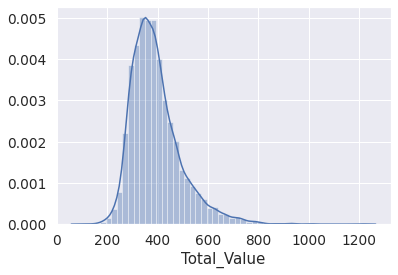

In [17]:
#Show Distribution of Total Value
#histogram
sns.distplot(df_train['Total_Value'])

#skewness and kurtosis
print("Skewness: %f" % df_train['Total_Value'].skew())
print("Kurtosis: %f" % df_train['Total_Value'].kurt())

In [18]:
'''Learning
Total_Value is highly '1.3' Positive Skewed
I think this means Houses are being sold for less than the average,
we will need to fix it with logs

Kurtosis > 3 so Total_Value is Leptokurtic
Total_Value does show peakness with tails longer 
on the right side.. check this later.. may
flatten because of outliers

'''

"Learning\nTotal_Value is highly '1.3' Positive Skewed\nI think this means Houses are being sold for less than the average,\nwe will need to fix it with logs\n\nKurtosis > 3 so Total_Value is Leptokurtic\nTotal_Value does show peakness with tails longer \non the right side.. check this later.. may\nflatten because of outliers\n\n"

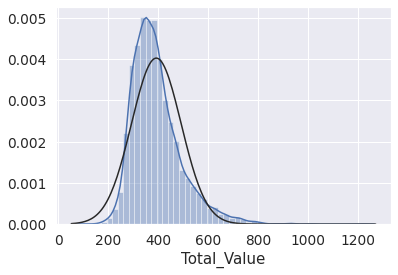

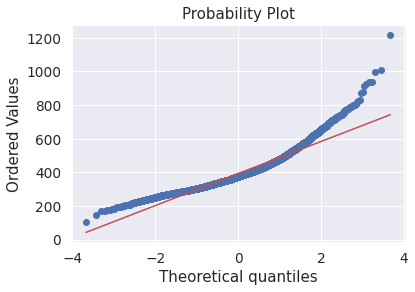

In [19]:
#Check for Normality
#histogram and normal probability plot
sns.distplot(df_train['Total_Value'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Total_Value'], plot=plt)


In [20]:
'''Learning
peaked and positive
does not follow theo lines in prob plot
'''

'Learning\npeaked and positive\ndoes not follow theo lines in prob plot\n'

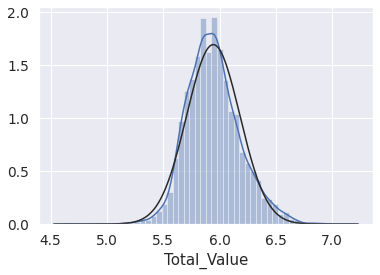

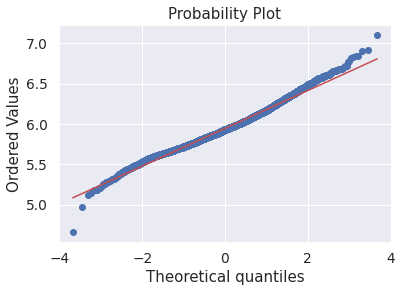

In [21]:
#applying log transformation
df_train['Total_Value'] = np.log(df_train['Total_Value'])
#transformed histogram and normal probability plot
sns.distplot(df_train['Total_Value'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Total_Value'], plot=plt)

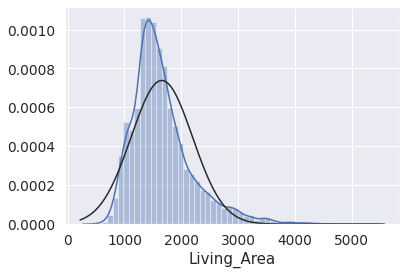

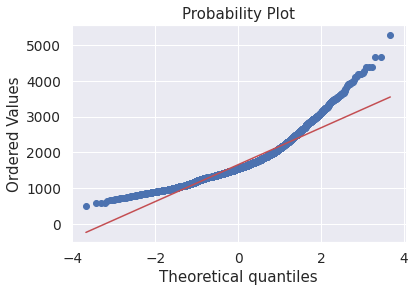

In [22]:
#histogram and normal probability plot
sns.distplot(df_train['Living_Area'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Living_Area'], plot=plt)

In [23]:
'''Learning
Living area is very skewed, let's fix with logs  '''

"Learning\nLiving area is very skewed, let's fix with logs  "

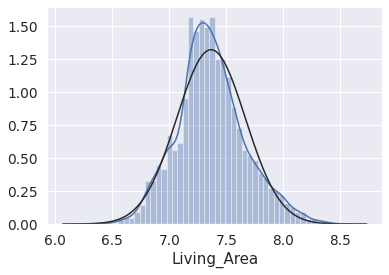

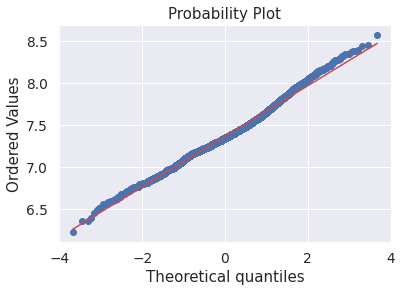

In [24]:
#data transformation
df_train['Living_Area'] = np.log(df_train['Living_Area'])
#transformed histogram and normal probability plot
sns.distplot(df_train['Living_Area'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Living_Area'], plot=plt)

In [25]:
'''Learning

If Living area is this skewed and Gross Area follows
we must test Gross Area'''


'Learning\n\nIf Living area is this skewed and Gross Area follows\nwe must test Gross Area'

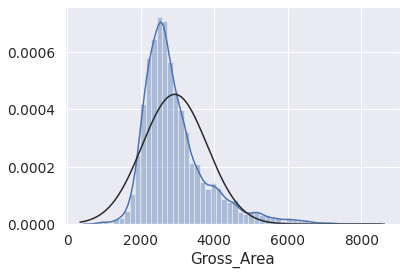

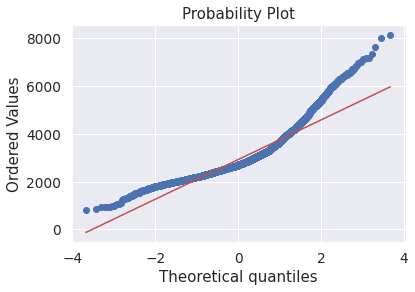

In [26]:
#histogram and normal probability plot
sns.distplot(df_train['Gross_Area'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Gross_Area'], plot=plt)

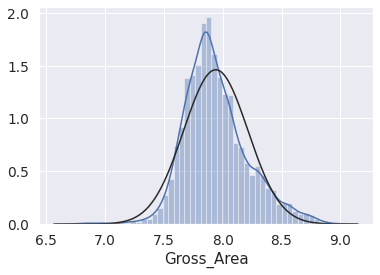

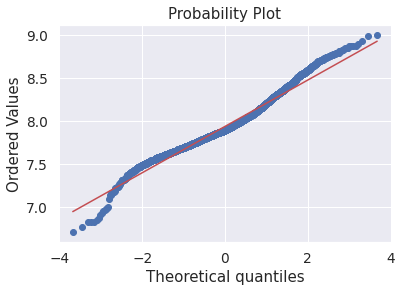

In [27]:
#data transformation
df_train['Gross_Area'] = np.log(df_train['Gross_Area'])
#transformed histogram and normal probability plot
sns.distplot(df_train['Gross_Area'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Gross_Area'], plot=plt)

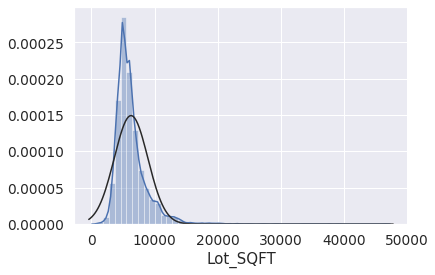

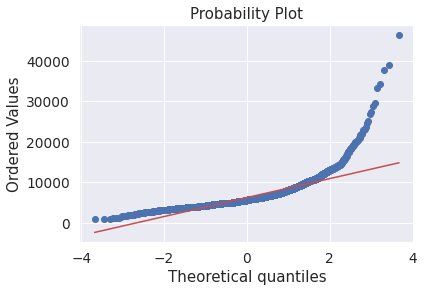

In [28]:
#histogram and normal probability plot
sns.distplot(df_train['Lot_SQFT'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Lot_SQFT'], plot=plt)


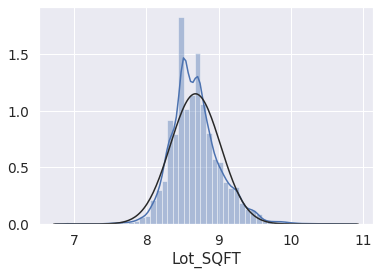

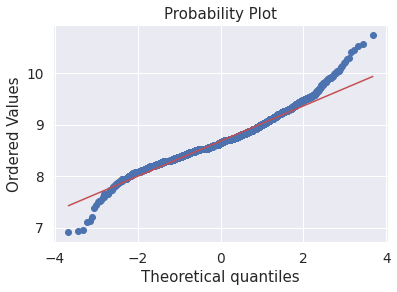

In [29]:
#data transformation
df_train['Lot_SQFT'] = np.log(df_train['Lot_SQFT'])
#transformed histogram and normal probability plot
sns.distplot(df_train['Lot_SQFT'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Lot_SQFT'], plot=plt)

In [30]:
#Let's make dummy variables
#Unique Values in Remodel
print(df_train['Remodel'].unique())

['None' 'Recent' 'Old']


In [31]:
#Dummy Variables
df_train = pd.get_dummies(df_train)

In [32]:
'''Now let's do Data Science

My Plan:
I plan to use several methods
Linear Regression (different forms)
Boosted Gradient
BayesianRidge

then simply stack these methods

'''
#Split dataframe into train and test
train, test = train_test_split(df_train, test_size=0.2)

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Total_Value.values
y_test = np.expm1(test.Total_Value.values)
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Total_Value'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

train = all_data[:ntrain]
test = all_data[ntrain:]


all_data size is : (5801, 14)


In [33]:
#DS libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


In [34]:
#Cross Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [35]:
'''Before building models I KNOW 
this dataset contains outliers
I know my linear regression models
are sensitive to outliers
so we can make them more robust using
sklearn (Robustscaler()) GBoost(loss = huber)
'''
#Linear Regression
lin_reg = make_pipeline(RobustScaler(), LinearRegression())

#Bayesian Ridge
BayRidge = make_pipeline(RobustScaler(), BayesianRidge(n_iter = 30))

#Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#Kernal Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#Gradient Boosting
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

In [36]:
score = rmsle_cv(lin_reg)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 0.1026 (0.0014)



In [37]:
score = rmsle_cv(BayRidge)
print("\nBayesianRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


BayesianRidge score: 0.1026 (0.0014)



In [38]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1026 (0.0013)



In [39]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1026 (0.0013)



In [40]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1007 (0.0015)



In [41]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0992 (0.0015)



In [42]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0963 (0.0005)



In [43]:
#Simple stacking class and function
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  



In [44]:
#We could add many more models but I wanted to have my top 3
averaged_models = AveragingModels(models = (model_xgb, GBoost, KRR))

#Use function to find rsme
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0957 (0.0007)



In [45]:
'''Learning
So stacking our 3 best performing models
did result in a better score but only slightly

we went from a rough 10.34% average error to
a 9.7% on a 100k house that saves us $500 per house

let's sell 2 a month, 12k a year is a nice bonus 
just from stacking these. With different boosting
params we may get it under 9%
'''

"Learning\nSo stacking our 3 best performing models\ndid result in a better score but only slightly\n\nwe went from a rough 10.34% average error to\na 9.7% on a 100k house that saves us $500 per house\n\nlet's sell 2 a month, 12k a year is a nice bonus \njust from stacking these. With different boosting\nparams we may get it under 9%\n"

In [47]:
#Fit models from average
averaged_models.fit(train.values, y_train)
#stacked_train_pred = averaged_models.predict(train)

#Convert to base from logs
stacked_pred = np.expm1(averaged_models.predict(test.values))




In [48]:
#Dataset setup to have predicted values in df
predicted_df = test.copy(deep=True)
predicted_df['predicted_Total_Value'] = stacked_pred


In [49]:

#Show Data frame with our predictions
print(predicted_df)

#Prepare dataframe in csv for model submission
predicted_df.to_csv('Submission.csv')

      Lot_SQFT  Year_Built  Gross_Area  Living_Area  FLOORS   Room_Count  \
4640  9.076809        1910    8.041735     7.489412      2.0           6   
4641  8.761237        1940    7.811973     6.988413      1.0           6   
4642  8.687611        1925    7.995307     7.447751      2.0           7   
4643  8.294550        1910    7.941296     7.457032      2.0           7   
4644  9.447702        1845    8.351375     7.754482      2.0           9   
...        ...         ...         ...          ...      ...         ...   
5796  9.190138        1910    8.417594     7.860571      2.0           9   
5797  8.576782        1960    7.710653     7.453562      1.0           8   
5798  8.871365        1935    7.835975     7.265430      2.0           6   
5799  9.306378        1920    8.019942     7.426549      1.5           7   
5800  8.615227        1930    8.215006     7.632401      2.0           8   

      Bedroom_Count  Full_Bath_Count  Half_Bath_Count  Kitchen_Count  \
4640           

In [50]:
'''
Let's build a first pass simple linear
regression like what we built in Excel Module 2

Let's use the log values to smooth it out 
'''
#show Linear Regression like the Excel First Pass
regr = LinearRegression()
regr.fit(train, y_train)

#Linear Reg prediction
'''Logs removed use np.expm1'''
#y_test = np.expm1(test.Total_Values)
y_predict = np.expm1(regr.predict(test.values))
#y_predict = regr.predict(test.values)

score = rmsle_cv(regr)

#Coefficients
#print("Coefficients: \n", regr.coef_)
cdf = pd.DataFrame(regr.coef_, train.columns, columns = ["Coefficients"])

print(cdf)

#r2 and mean squared values
r_squared = r2_score(y_test,y_predict)
mean_square = mean_squared_error((y_test),(y_predict))
root_mean_square = mean_squared_error((y_test),(y_predict) ,squared = False)

print("\nLinear Regression Mean Error score: {:.4f}\n".format(mean_square))
print("\nLinear Regression Root Mean Error score: {:.4f}\n".format(root_mean_square))
print("\nLinear Regression  R squared score: {:.4f}\n".format(r_squared))


                 Coefficients
Lot_SQFT             0.187096
Year_Built           0.000334
Gross_Area           0.262515
Living_Area          0.149078
FLOORS               0.124043
Room_Count           0.004685
Bedroom_Count       -0.001458
Full_Bath_Count      0.037939
Half_Bath_Count      0.040951
Kitchen_Count       -0.016774
Fireplace_Count      0.046446
Remodel_None        -0.025923
Remodel_Old         -0.014005
Remodel_Recent       0.039928

Linear Regression Mean Error score: 1832.2047


Linear Regression Root Mean Error score: 42.8043


Linear Regression  R squared score: 0.8084



In [51]:
test_to_prediction_df = pd.DataFrame(np.hstack((y_test)), columns= ["test"])

test_to_prediction_df['prediction'] = np.hstack((y_predict))

test_to_prediction_df['error_value'] = test_to_prediction_df['test']-test_to_prediction_df['prediction']

print("\nSum of errors by subtracting prediction from test values: {:.4f}\n".format(sum(test_to_prediction_df['error_value'])))


Sum of errors by subtracting prediction from test values: 5094.7127



In [52]:
test_to_prediction_df

,test,prediction,error_value
0,430.5,422.018593,8.481407
1,300.9,311.571659,-10.671659
2,431.4,423.230020,8.169980
3,390.2,354.346005,35.853995
4,434.4,532.698161,-98.298161
...,...,...,...
1156,513.8,534.457628,-20.657628
1157,330.1,311.744478,18.355522
1158,386.3,419.823214,-33.523214
1159,408.4,430.696290,-22.296290
